# 객체검출 API를 이용한 사진속 객체 검출


### 기본 ulr 및 사용자 인증키, 대상 이미지, 파일 형식 정의

In [14]:
#-*- coding:utf-8 -*-
import urllib3
import json
import base64

openApiURL = "http://aiopen.etri.re.kr:8000/ObjectDetect"
accessKey = ""          # 개인 인증키
imageFilePath = "c:/pythonworkspace/multi/0730/data/거리3.jpg"                           # 대상 이미지
type = "jpg"                                    # 이미지 형식, 파일 확장자

### 대상 파일 읽어와 base64 모듈을 이용 decode 진행

In [15]:
file = open(imageFilePath, "rb")
imageContents = base64.b64encode(file.read()).decode("utf8")
file.close()

### 데이터 요청을 위한 딕셔너리 구조의 요청 구문 작성

In [16]:
requestJson = {
    "access_key": accessKey,
    "argument": {
        "type": type,
        "file": imageContents
    }
}

### 데이터 요청


In [17]:
http = urllib3.PoolManager()
response = http.request(
    "POST",
    openApiURL,
    headers={"Content-Type": "application/json; charset=UTF-8"},
    body=json.dumps(requestJson)
)
 
print(f"[responseCode]={str(response.status)}")
# print("[responBody]")
# print(response.data)

[responseCode]=200


In [18]:
response.data

b'{"result":0,"return_object":{"data":[{"class":"person","confidence":"0.997594","x":"202","y":"325","width":"26","height":"85"},{"class":"person","confidence":"0.968203","x":"305","y":"333","width":"12","height":"37"},{"class":"person","confidence":"0.678817","x":"179","y":"337","width":"20","height":"39"},{"class":"car","confidence":"0.966470","x":"262","y":"340","width":"34","height":"37"},{"class":"car","confidence":"0.874580","x":"217","y":"335","width":"53","height":"45"}]}}'

In [ ]:
json_data = json.loads(response.data)
prn_data = json_data['return_object']
prn_data

In [23]:
import pandas as pd

df1 = pd.DataFrame(prn_data['data'])
df1

,class,confidence,x,y,width,height
0,person,0.997594,202,325,26,85
1,person,0.968203,305,333,12,37
2,person,0.678817,179,337,20,39
3,car,0.966470,262,340,34,37
4,car,0.874580,217,335,53,45


In [24]:
import numpy as np

np.array(prn_data['data'], dtype='str')

array(["{'class': 'person', 'confidence': '0.997594', 'x': '202', 'y': '325', 'width': '26', 'height': '85'}",
       "{'class': 'person', 'confidence': '0.968203', 'x': '305', 'y': '333', 'width': '12', 'height': '37'}",
       "{'class': 'person', 'confidence': '0.678817', 'x': '179', 'y': '337', 'width': '20', 'height': '39'}",
       "{'class': 'car', 'confidence': '0.966470', 'x': '262', 'y': '340', 'width': '34', 'height': '37'}",
       "{'class': 'car', 'confidence': '0.874580', 'x': '217', 'y': '335', 'width': '53', 'height': '45'}"],
      dtype='<U100')

In [26]:
df1 = df1.astype({'confidence':'float', 'x':int, 'y':int, 'width':int, 'height':int})
df1.dtypes

class          object
confidence    float64
x               int32
y               int32
width           int32
height          int32
dtype: object

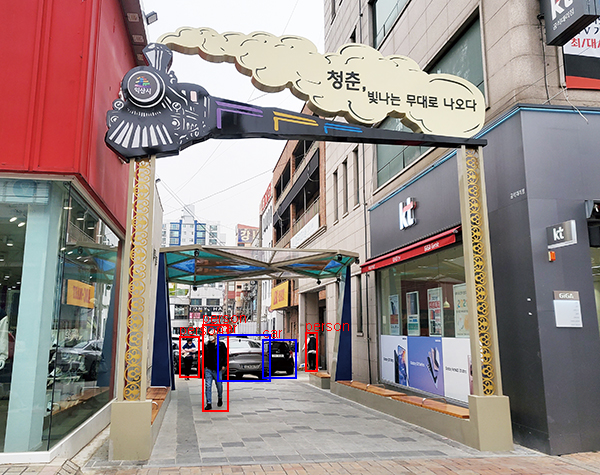

In [32]:
from PIL import Image, ImageDraw, ImageFont

img = Image.open('c:/pythonworkspace/multi/0730/data/거리3.jpg')
font = ImageFont.truetype('c:/windows/fonts/gulim.ttc', 15) # 폰트사이즈 15
draw = ImageDraw.Draw(img)

for i in range(len(df1)):
    x=df1.iloc[i, 2]
    y=df1.iloc[i, 3]
    w=df1.iloc[i, 4]
    h=df1.iloc[i, 5]

    if df1.iloc[i, 0] == 'person':
        color=(255,0,0)
    elif df1.iloc[i, 0] == 'car':
        color=(0,0,255)
    else:
        color = (0,255,0)
        
    draw.line([(x,y), (x,y+h), (x+w, y+h), (x+w, y), (x,y)], fill=color, width=2)
    draw.text((x, y-15), df1.iloc[i, 0], font = font, fill='red')

img